In [1]:
# -*- coding: utf-8 -*-
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter 
from imblearn.combine import SMOTEENN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import validation_curve

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

C:\Users\zs\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# Load data
data = pd.read_csv(r'E:/huan/ml/data/new/new01.csv')
data = data.fillna(0)
X = data.iloc[:, np.r_[1:13,16:17]].values
Y = data['remote1'].values 
print(X,Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size=0.8)

[[2.65522594e+01 2.65522594e+01 7.99000000e+03 ... 1.00677980e+00
  1.40000000e+03 1.20000000e+01]
 [2.69640179e+01 2.69640179e+01 7.99000000e+03 ... 1.00377230e+00
  1.40000000e+03 1.20000000e+01]
 [2.46682053e+01 2.46682053e+01 7.99000000e+03 ... 1.00395260e+00
  1.40000000e+03 1.20000000e+01]
 ...
 [2.38685815e+03 2.58289868e+03 8.65500000e+03 ... 1.08457950e+00
  1.40000000e+03 9.00000000e+00]
 [1.99688309e+02 5.48773003e+01 5.85900000e+03 ... 1.04616280e+00
  1.20000000e+03 1.10000000e+01]
 [6.57715186e+03 7.15558740e+03 8.46600000e+03 ... 1.09718880e+00
  1.60000000e+03 1.00000000e+00]] [1 1 1 ... 0 0 0]


In [3]:
# Validation curve
from sklearn.model_selection import validation_curve

def cv_curve(clf,param_range,x_train, y_train,param_name):
    train_scores, test_scores = validation_curve(clf, x_train, y_train, 
                                                 param_name=param_name, 
                                                 param_range=param_range,
                                                 cv=5, scoring="accuracy", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    figure=plt.figure(figsize=(4,4), dpi=200)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.grid()


In [4]:
def cv_curve_log(clf,param_range,x_train, y_train,param_name):
    train_scores, test_scores = validation_curve(clf, x_train, y_train, 
                                                 param_name=param_name, 
                                                 param_range=param_range,
                                                 cv=5, scoring="accuracy", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    figure=plt.figure(figsize=(4,4), dpi=200)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.grid()

In [5]:
# Precision statistics
import warnings
warnings.filterwarnings("ignore")
def accuracy(clf,x_train,x_test,y_train,y_test):
    y_pred = clf.predict(x_test)
    print("acc_test=", accuracy_score(y_test, y_pred))
    y_pred = clf.predict(x_train)
    print("acc_train=", accuracy_score(y_train, y_pred))
# Classification report
def report (modle,x_train,y_train):
    y_pred=modle.predict(x_train)
    reports=classification_report(y_train,y_pred)
    print("分类报告：\n", reports)

def cross_accuracy(clf,x_train,x_test,y_train,y_test):
    scores=cross_val_score(clf,x_test,y_test,cv=5,scoring='accuracy')
    print("acc_cv_test=",scores.mean())
    scores=cross_val_score(clf,x_train,y_train,cv=5,scoring='accuracy')
    print("acc_cv_train=",scores.mean() )

In [6]:
# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. 
    
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
   
    print(cm)
    fig, ax = plt.subplots(figsize=(12, 8),dpi=200)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=12)
    fig.tight_layout()
    return ax

labels = ['0','1']

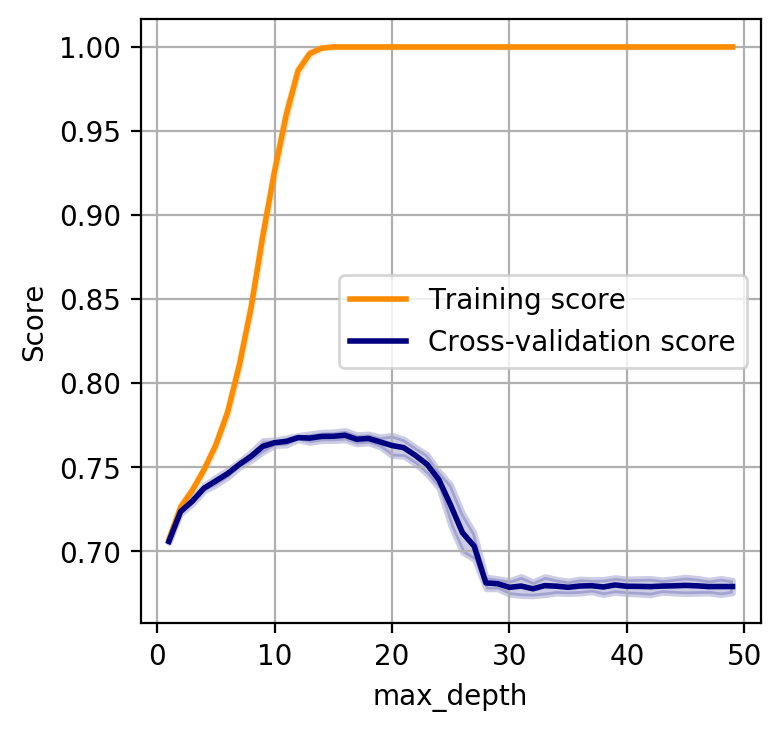

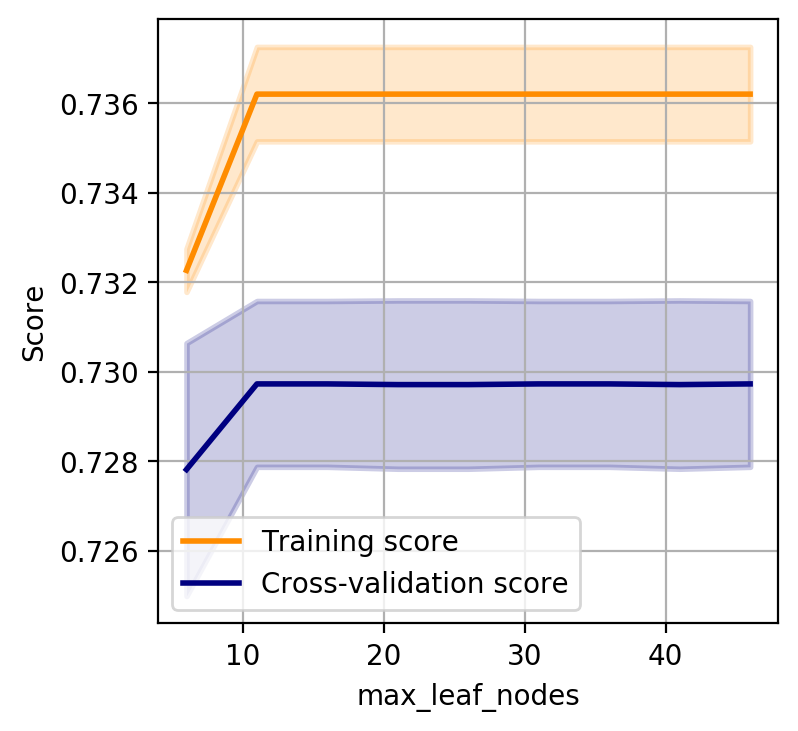

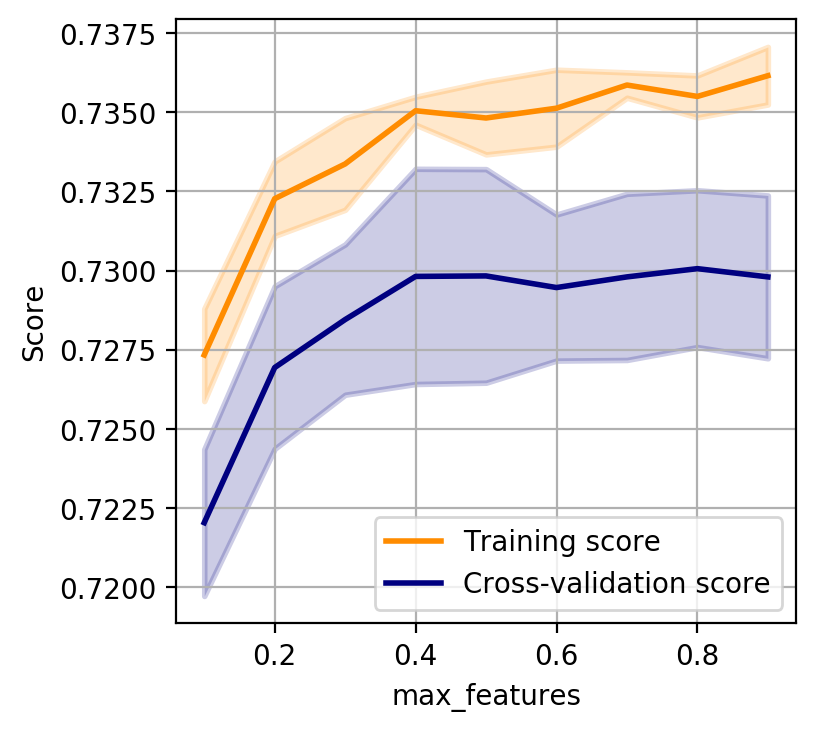

In [7]:
# GBDT Validation curve
#n = np.arange(1,1200,100)
depths = np.arange(1,50)
nodes = np.arange(1,50,5)
features=np.linspace(0.1,1,num=9,endpoint=False)

ranges=(depths,nodes,features)
#n,
params=("max_depth",'max_leaf_nodes','max_features')
#'n_estimators',
for param_range,param_name in zip(ranges,params):
    clf=GradientBoostingClassifier()
    cv_curve(clf,param_range,x_train,y_train,param_name)
    plt.savefig('E:/huan/ml/figure/GBDTfeisu' + param_name + '.jpg' , format='jpg')
    plt.show()

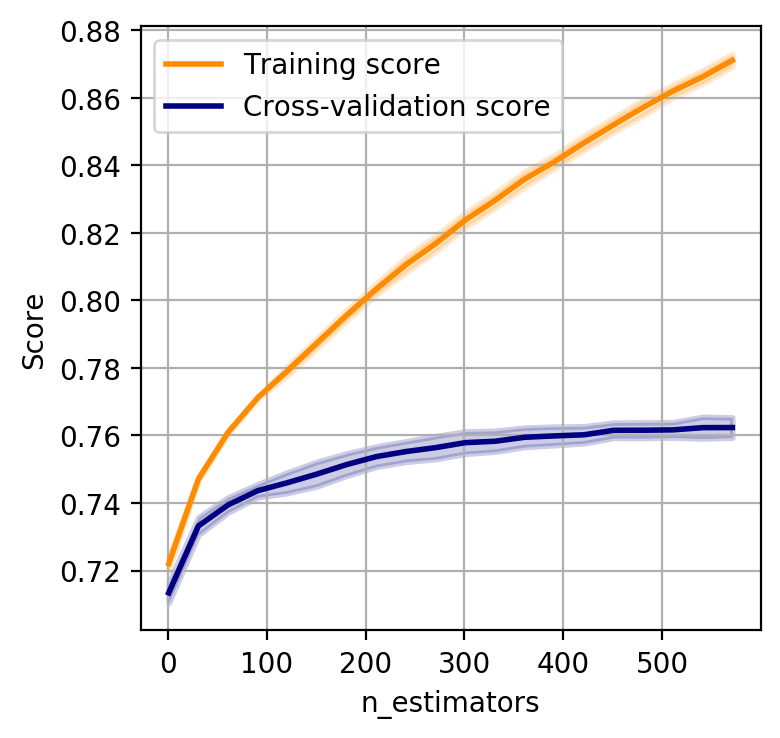

In [ ]:
# XGB Validation curve
n = np.arange(1,600,30)
depths = np.arange(1,50)
alpha = np.linspace(0,1,num=10,endpoint=False)
lambdas = np.linspace(0,1,num=10,endpoint=False)
ranges=(n,depths,alpha,lambdas)
params=("n_estimators","max_depth",'reg_alpha','reg_lambda')

#验证曲线
for param_range,param_name in zip(ranges,params):
    clf=xgb.XGBClassifier(eval_metric=['logloss','auc','error'],learning_rate=0.1,n_jobs=-1)
    cv_curve(clf,param_range,x_train,y_train,param_name)
    plt.savefig('E:/huan/ml/figure/XGBfeisu' + param_name + '.jpg' , format='jpg')
    plt.show()
    